$$
\newcommand{\x}{\mathbf{x}}
\newcommand{\y}{\mathbf{y}}
\newcommand{\price}{{p}}
\newcommand{\ret}{{r}}
\newcommand{\tp}{{(t)}}
\newcommand{\aapl}{{\text{AAPL}}}
\newcommand{\ba}{{\text{BA}}}
\newcommand{\spy}{{\text{SPY}}}
$$

# Machine Learning for Hedging


##  Objectives
Establish the relationship between the returns of individual equities and "the market" with Linear Regression. The goal is to build multi-asset portfolios that have better risk/return characteristics than a portfolio consisting of a single asset.


# The data

The data are the daily prices of a number of individual equities and equity indices.
The prices are arranged in a series in ascending date order (a timeseries).
- There is a separate `.csv` file for each equity or index in the directory `data/assignment_1`

## Reading the data

You should get the price data into some sort of data structure.  Pandas DataFrame is super useful
so I recommend that's what you use (not required though).

**Hints**: 
- look up the Pandas `read_csv` method
- it will be very convenient to use dates as the index of your DataFrame

## Preliminary data preparation

In the rest of the assignment we will *not* be working with prices but with *returns* (percent change in prices).
For example, for ticker $\aapl$ (Apple)

$$
\begin{array}[lll]\\
\ret_\aapl^\tp = \frac{\price _\aapl^\tp}{\price _\aapl^{(t-1)}} -1 \\
\text{where} \\
\price_\aapl^\tp \text{ denotes the price of ticker } \aapl \text{ on date } t \\
\ret_\aapl^\tp \text{ denotes the return of ticker } \aapl \text{ on date } t
\end{array}
$$

- You will want to convert the price data into return data
- We only want the returns for the year 2018; discard any other return

**Question**
Replace the 0 values in the following cell with your answers, and execute the print statements

In [44]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

# reading the data, each in a separate df
# root = 'C:/Users/Allen Tao/Desktop/FRE 7773/Assignments/A1/A1 Data/'
# fileList = os.listdir(root)

# for file in fileList:
#     name = f'df_{file}'.replace('.csv', '')
#     locals()[name] = pd.read_csv(root + file)

# dfList = [df_AAPL, df_BA, df_FB, df_GS, df_MRK, df_PFE, df_QQQ, df_SPY, df_VZ, df_WMT, df_XLB,
#           df_XLE, df_XLF, df_XLI, df_XLK, df_XLP, df_XLRE, df_XLU, df_XLV, df_XLY]

# load AAPL into df
root = 'C:/Users/Allen Tao/Desktop/FRE 7773/Assignments/A1/A1 Data/'
df_AAPL = pd.read_csv(root + 'AAPL.csv', index_col='Dt', parse_dates=True)
df_AAPL.head()


,Close
Dt,
2017-12-27,170.60
2017-12-28,171.08
2017-12-29,169.23
2018-01-02,172.26
2018-01-03,172.23


In [46]:
# compute returns, drop data besides 2018

df_AAPL['Returns'] = df_AAPL['Close'] / df_AAPL.shift(1)['Close'] - 1
df_AAPL_2018 = df_AAPL.loc['2018']

df_AAPL_2018.describe()
df_AAPL_2018.head()
df_AAPL_2018.tail()


,Close,Returns
count,251.000000,251.000000
mean,189.053426,-0.000117
std,20.593860,0.018109
min,146.830000,-0.066331
25%,173.140000,-0.008958
50%,186.050000,0.000524
75%,207.760000,0.009380
max,232.070000,0.070422


,Close,Returns
Dt,,
2018-01-02,172.26,0.017905
2018-01-03,172.23,-0.000174
2018-01-04,173.03,0.004645
2018-01-05,175.00,0.011385
2018-01-08,174.35,-0.003714


,Close,Returns
Dt,,
2018-12-24,146.83,-0.025874
2018-12-26,157.17,0.070422
2018-12-27,156.15,-0.006490
2018-12-28,156.23,0.000512
2018-12-31,157.74,0.009665


In [47]:
num_returns = df_AAPL_2018['Returns'].count()  # Number of returns in year 2018
first_return = df_AAPL_2018['Returns'][0] # The return on the earliest date in 2018
last_return  = df_AAPL_2018['Returns'][-1] # The return on the latest date in 2018
avg_return  =  df_AAPL_2018['Returns'].mean() # The average return over the  year 2018

print("There are {num:d} returns. First={first:3.2f}, Last={last:3.2f}, Avg={avg:3.2f}".format(num=num_returns, first=first_return, last=last_return, avg=avg_return))

There are 251 returns. First=0.02, Last=0.01, Avg=-0.00


# Split into Train and Test datasets

In general, you will split the data into two sets by choosing the members of each set at random.

To facilitate grading for this assignment, we will *use a specific test set*
- the training set are the returns for the months of January through September (inclusive), i.e., 9 months
- the test set are the returns for the months of October through December (inclusive), i.e., 3 months

Thus, you will be using the early part of the data for training, and the latter part of the data for testing.

**Question**
Replace the 0 values in the following cell with your answers, and execute the print statements

In [48]:
# split test/train data
AAPL_train = df_AAPL_2018.loc['2018-01':'2018-9'][['Returns']]
AAPL_test = df_AAPL_2018.loc['2018-10':'2018-12'][['Returns']]

AAPL_train.head()
AAPL_train.tail()
AAPL_train.describe()

AAPL_test.head()
AAPL_test.tail()
AAPL_test.describe()

,Returns
Dt,
2018-01-02,0.017905
2018-01-03,-0.000174
2018-01-04,0.004645
2018-01-05,0.011385
2018-01-08,-0.003714


,Returns
Dt,
2018-09-24,0.014380
2018-09-25,0.006341
2018-09-26,-0.007966
2018-09-27,0.020552
2018-09-28,0.003512


,Returns
count,188.000000
mean,0.001639
std,0.014601
min,-0.043390
25%,-0.006002
50%,0.001374
75%,0.008265
max,0.058910


,Returns
Dt,
2018-10-01,0.006733
2018-10-02,0.008888
2018-10-03,0.012169
2018-10-04,-0.017581
2018-10-05,-0.016229


,Returns
Dt,
2018-12-24,-0.025874
2018-12-26,0.070422
2018-12-27,-0.006490
2018-12-28,0.000512
2018-12-31,0.009665


,Returns
count,63.000000
mean,-0.005356
std,0.025339
min,-0.066331
25%,-0.024304
50%,-0.005402
75%,0.011008
max,0.070422


In [49]:
train_num_returns = AAPL_train['Returns'].count()  # Number of returns in training set
train_first_return = AAPL_train['Returns'][0] # The return on the earliest date in training set
train_last_return  = AAPL_train['Returns'][-1] # The return on the latest date in training set
train_avg_return  = AAPL_train['Returns'].mean() # The average return over the  year training set

print("Training set: There are {num:d} returns. First={first:3.2f}, Last={last:3.2f}, Avg={avg:3.2f}".format(num=train_num_returns, 
                                                                                                             first=train_first_return, 
                                                                                                             last=train_last_return, 
                                                                                                             avg=train_avg_return))

test_num_returns = AAPL_test['Returns'].count()  # Number of returns in test set
test_first_return = AAPL_test['Returns'][0] # The return on the earliest date in test set
test_last_return  = AAPL_test['Returns'][-1] # The return on the latest date in test set
test_avg_return  = AAPL_test['Returns'].mean() # The average return over the  year test set

print("Test set: There are {num:d} returns. First={first:3.2f}, Last={last:3.2f}, Avg={avg:3.2f}".format(num=test_num_returns, 
                                                                                                         first=test_first_return, 
                                                                                                         last=test_last_return, 
                                                                                                         avg=test_avg_return))

Training set: There are 188 returns. First=0.02, Last=0.00, Avg=0.00
Test set: There are 63 returns. First=0.01, Last=0.01, Avg=-0.01


# $\aapl$ regression

Use Linear Regression to predict the return of a ticker from the return of the $\spy$ index.
For example, for ticker $\aapl$

$$
\ret_\aapl^\tp =  \beta_{\aapl, \spy} * \ret_\spy^\tp + \epsilon_{\aapl}^\tp
$$

That is
- each example is a pair consisting of one day's return 
    - of the ticker (e.g., $\aapl$).  This is the target (e.g, $\y$ in our lectures)
    - of the index $\spy$. This is a feature vector of length 1 (e.g., $\x$ in our lectures)

You will use Linear Regression to solve for parameter $\beta_{\aapl, \spy}$ 

- In the lectures we used the symbol $\Theta$ to denote the parameter vector; here we use $\mathbf{\beta}$
- In Finance the symbol $\beta$ is often used to denote the relationship between returns. 
- You may should add an "intercept" so that the feature vector is length 2 rather than length 1
    - $\x^\tp = \begin{pmatrix}
        1 \\
        \ret_\spy^\tp
        \end{pmatrix}$




- Report the $\mathbf{\beta}$ parameter vector you obtain for $\aapl$
    - you will subsequently do this for another ticker in a different part of the assignment
        - so think ahead: you may want to parameterize your code
        - change the assignment to `ticker` when you report the next part

        
**Question**
Replace the 0 values in the following cell with your answers, and execute the print statements


In [50]:
# automating loading, returns calculatino, and train/test spliting process
def loadReturnsSplit(ticker, root='C:/Users/Allen Tao/Desktop/FRE 7773/Assignments/A1/A1 Data/'):
    '''
    Automate data cleaning process: loading, compute returns, drop data outside 2018 and price column,
    split test/train data by month 1-9/10-12
    Input: ticker(str), root(default to data storage folder)
    output: two df containing train/test set returns data
    '''
    # load spy
    df = pd.read_csv(root + f'{ticker}.csv', index_col='Dt', parse_dates=True)

    # compute returns, drop data besides 2018
    df['Returns'] = df['Close'] / df.shift(1)['Close'] - 1
    df_2018 = df.loc['2018']

    # split test/train data
    train = df_2018.loc['2018-01':'2018-9'][['Returns']]
    test = df_2018.loc['2018-10':'2018-12'][['Returns']]
    
    return train, test

# prep SPY
SPY_train, SPY_test = loadReturnsSplit('SPY')

SPY_train.head()
SPY_train.tail()
SPY_train.describe()
SPY_test.head()
SPY_test.tail()
SPY_test.describe()


,Returns
Dt,
2018-01-02,0.007157
2018-01-03,0.006325
2018-01-04,0.004215
2018-01-05,0.006664
2018-01-08,0.001829


,Returns
Dt,
2018-09-24,-0.003322
2018-09-25,-0.000928
2018-09-26,-0.002992
2018-09-27,0.002794
2018-09-28,0.000103


,Returns
count,188.000000
mean,0.000495
std,0.008870
min,-0.041822
25%,-0.003055
50%,0.000863
75%,0.005431
max,0.027359


,Returns
Dt,
2018-10-01,0.003474
2018-10-02,-0.000583
2018-10-03,0.000549
2018-10-04,-0.007816
2018-10-05,-0.005597


,Returns
Dt,
2018-12-24,-0.026423
2018-12-26,0.050525
2018-12-27,0.007677
2018-12-28,-0.001290
2018-12-31,0.008759


,Returns
count,63.000000
mean,-0.002286
std,0.015050
min,-0.032402
25%,-0.012105
50%,-0.001290
75%,0.005806
max,0.050525


In [51]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# run linearreg
AAPL_SPY_linReg = linear_model.LinearRegression()

# Train the model using the training sets
_ = AAPL_SPY_linReg.fit(SPY_train, AAPL_train)

# predict AAPL return with test
tindex = AAPL_test.index
AAPL_ret_predict = pd.DataFrame(AAPL_SPY_linReg.predict(AAPL_test), columns=['Ret_predict'], index=tindex)
AAPL_ret_predict.describe()
AAPL_ret_predict.tail()

,Ret_predict
count,63.000000
mean,-0.004629
std,0.027144
min,-0.069947
25%,-0.024926
50%,-0.004678
75%,0.012901
max,0.076547


,Ret_predict
Dt,
2018-12-24,-0.026608
2018-12-26,0.076547
2018-12-27,-0.005843
2018-12-28,0.001658
2018-12-31,0.011463


In [52]:
beta_0 = np.squeeze(AAPL_SPY_linReg.coef_)    # The regression parameter for the constant
beta_SPY = np.squeeze(AAPL_SPY_linReg.intercept_)  # The regression parameter for the return of SPY
ticker = "AAPL"

print("{t:s}: beta_0={b0:3.2f}, beta_SPY={b1:3.2f}".format(t=ticker, b0=beta_0, b1=beta_SPY))


AAPL: beta_0=1.07, beta_SPY=0.00


- Report the average of the cross validation scores, using 5 fold cross validation

**Question**
Replace the 0 values in the following cell with your answers, and execute the print statements


In [53]:
from sklearn.model_selection import cross_val_score
cvs_AAPL_SPY = cross_val_score(AAPL_SPY_linReg, AAPL_train, SPY_train, cv=5)


In [54]:
cross_val_avg = np.average(cvs_AAPL_SPY)

print("{t:s}: Avg cross val score = {sc:3.2f}".format(t=ticker, sc=cross_val_avg) )

AAPL: Avg cross val score = 0.06


## $\aapl$ hedged returns

- Compute the series
$$
{\ret'}_{\aapl}^\tp = \ret_\aapl^\tp - \beta_{\aapl, \spy} * \ret_\spy^\tp
$$
for all dates $t$ in the test set.  
- Sort the dates in ascending order and plot the timeseries ${\ret}'_{\aapl}$

${\ret}'_{\aapl}$ is called the "hedged return" of $\aapl$
- It is the daily return you would realize if you created a portfolio that was
    - long 1 dollar of $\aapl$
    - short $\beta_{\aapl, \spy}$ dollars of the index $\spy$
- It represents the outperformance of $\aapl$ relative to the index $\spy$
    - $\spy$ is the proxy for "the market" (it tracks the S&P 500 index)
    - The hedged return is the *value added* by going long $\aapl$ rather than just going "long the market"
    - Sometimes referred to as the "alpha" ($\alpha_\aapl$)
- So **if** you are able to correctly forecast that $\aapl$ will have positive outperformance (i.e, have $\alpha_\aapl > 0$ most days)
    - then you can earn a positive return regardless of whether the market ($\spy$) goes up or down !
    - this is much lower risk than just holding $\aapl$ long
    - people will pay you very well if you can really forecast correctly !

**Question**
Replace the 0 values in the following cell with your answers, and execute the print statements

In [55]:
# compute alpha
alpha_AAPL_SPY = AAPL_test - beta_SPY * SPY_test
alpha_AAPL_SPY.head()
alpha_AAPL_SPY.tail()
alpha_AAPL_SPY.describe()


,Returns
Dt,
2018-10-01,0.006730
2018-10-02,0.008889
2018-10-03,0.012168
2018-10-04,-0.017572
2018-10-05,-0.016223


,Returns
Dt,
2018-12-24,-0.025845
2018-12-26,0.070366
2018-12-27,-0.006498
2018-12-28,0.000514
2018-12-31,0.009656


,Returns
count,63.000000
mean,-0.005353
std,0.025325
min,-0.066324
25%,-0.024287
50%,-0.005409
75%,0.011007
max,0.070366


In [56]:
hedged_num_returns = alpha_AAPL_SPY['Returns'].count()  # Number of returns in hedged series
hedged_first_return = alpha_AAPL_SPY['Returns'][0] # The return on the earliest date in hedged series
hedged_last_return  = alpha_AAPL_SPY['Returns'][-1] # The return on the latest date in hedged series
hedged_avg_return  = alpha_AAPL_SPY['Returns'].mean()  # The average return over the hedged series

ticker="AAPL"
print("{t:s} hedged returns: There are {num:d} returns. First={first:3.2f}, Last={last:3.2f}, Avg={avg:3.2f}".format(t=ticker,
                                                                                                                    num=hedged_num_returns,
                                                                                                                    first=hedged_first_return, 
                                                                                                                    last=hedged_last_return, 
                                                                                                                    avg=hedged_avg_return))


AAPL hedged returns: There are 63 returns. First=0.01, Last=0.01, Avg=-0.01


<AxesSubplot:xlabel='Dt'>

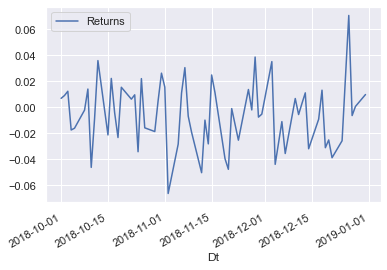

In [57]:
# plot alpha
alpha_AAPL_SPY.plot()



# $\ba$ regression

Repeat the regression you carried out for $\aapl$ but this time instead for the ticker $\ba$ (Boeing)

**Motivation**

The idea is to encourage you to build re-usable pieces of code.

So if you created some functions in solving Part 1, you may reuse these functions to easily solve part 2,
particulary if you treated the ticker (e.g., $\aapl$ or $\ba$) as a parameter to your functions.

If you simply copy and paste the code from Part 1 you will only get partial credit.


**Question**
Replace the 0 values in the following cell with your answers, and execute the print statements

In [58]:
# load, clean, prep, split
BA_train, BA_test = loadReturnsSplit('BA')

# linear regression
BA_SPY_linReg = linear_model.LinearRegression()
_ = BA_SPY_linReg.fit(SPY_train, BA_train)

# predict
BA_ret_predict = pd.DataFrame(BA_SPY_linReg.predict(BA_test), columns=['Ret_predict'], index=tindex)

In [59]:
beta_0 = np.squeeze(BA_SPY_linReg.coef_)    # The regression parameter for the constant
beta_SPY = np.squeeze(BA_SPY_linReg.intercept_)  # The regression parameter for the return of SPY
ticker = "BA"

print("{t:s}: beta_0={b0:3.2f}, beta_SPY={b1:3.2f}".format(t=ticker, b0=beta_0, b1=beta_SPY))


BA: beta_0=1.36, beta_SPY=0.00


**Question**
Replace the 0 values in the following cell with your answers, and execute the print statements

In [60]:
# cv
cvs_BA_SPY = cross_val_score(BA_SPY_linReg, BA_train, BA_train, cv=5)

In [61]:
cross_val_avg = np.average(cvs_BA_SPY)

print("{t:s}: Avg cross val score = {sc:3.2f}".format(t=ticker, sc=cross_val_avg) )

BA: Avg cross val score = 1.00


**Question**
Replace the 0 values in the following cell with your answers, and execute the print statements

In [62]:
# alpha
alpha_BA_SPY = BA_test - beta_SPY * BA_test


In [63]:
hedged_num_returns = alpha_BA_SPY['Returns'].count()  # Number of returns in hedged series
hedged_first_return = alpha_BA_SPY['Returns'][0] # The return on the earliest date in hedged series
hedged_last_return  = alpha_BA_SPY['Returns'][-1] # The return on the latest date in hedged series
hedged_avg_return  = alpha_BA_SPY['Returns'].mean()  # The average return over the hedged series

ticker="BA"
print("{t:s} hedged returns: There are {num:d} returns. First={first:3.2f}, Last={last:3.2f}, Avg={avg:3.2f}".format(t=ticker,
                                                                                                                    num=hedged_num_returns,
                                                                                                                    first=hedged_first_return, 
                                                                                                                    last=hedged_last_return, 
                                                                                                                    avg=hedged_avg_return))


BA hedged returns: There are 63 returns. First=0.03, Last=0.02, Avg=-0.00


<AxesSubplot:xlabel='Dt'>

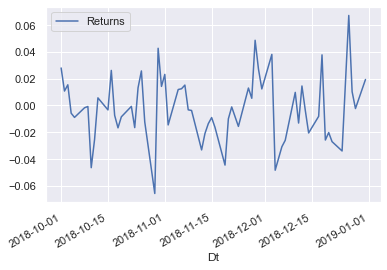

In [64]:
# plot alpha
alpha_BA_SPY.plot()

# Returns to prices

- You have already computed the predicted returns of $\aapl$ for each date in the test set.
- Create the predicted *price* timeseries for $\aapl$ for the date range in the test set
- Plot (on the same graph) the actual price timeseries of $\aapl$ and the predicted price timeseries.

There is a particular reason that we choose to perform the Linear Regression on returns rather than prices.

It is beyond the scope of this lecture to explain why, but we want to show that we can easily convert
back into prices.

**Question**
Replace the 0 values in the following cell with your answers, and execute the print statements

In [65]:
# last price b4 test set
lclose = df_AAPL_2018.loc['2018-09':'2018-09'].iloc[-1]['Close']

# compute predicted price
def pred2price(prediction, column1='Ret_predict'):
    prediction = prediction.reset_index(drop=True)
    pred_list = prediction[column1].tolist()
    
    for i in range(len(pred_list)):
        pred_list[i] += 1
        if i == 0:
            pred_list[i] = pred_list[i] * lclose
        else:
            pred_list[i] = pred_list[i] * pred_list[i - 1]

        price = pd.DataFrame(pred_list, columns = ['Price_predict'], index=AAPL_test.index)
    
    return price


pred_price = pred2price(AAPL_ret_predict)

<AxesSubplot:xlabel='Dt'>

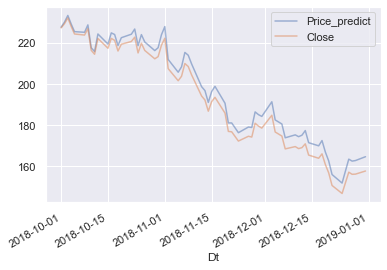

In [66]:
# get actual AAPL prices
AAPL_test_close = df_AAPL_2018['2018-10':'2018-12'][['Close']]
AAPL_predict_actual = pd.concat([pred_price, AAPL_test_close], axis=1)
AAPL_predict_actual.plot(alpha=0.5, style='-')

In [67]:
num_prices = AAPL_predict_actual['Price_predict'].count() # Number of prices in price series
first_price = AAPL_predict_actual['Price_predict'][0] # The price on the earliest date in price series
last_price  = AAPL_predict_actual['Price_predict'][-1] # The price on the latest date in price series
avg_price  = AAPL_predict_actual['Price_predict'].mean()  # The average price over the price series

ticker="AAPL"
print("{t:s} predicted prices: There are {num:d} prices. First={first:3.2f}, Last={last:3.2f}, Avg={avg:3.2f}".format(t=ticker,
                                                                                                                    num=num_prices,
                                                                                                                    first=first_price, 
                                                                                                                    last=last_price, 
                                                                                                                    avg=avg_price))
 

AAPL predicted prices: There are 63 prices. First=227.62, Last=164.69, Avg=198.28


# Extra credit

The data directory has the prices of many other indices.
- Any ticker in the directory beginning with the letter "X" is an index

Choose *one* index (we'll call it $I$) other than $\spy$ to use as a second feature and compute the Linear Regression

$$
\ret_\aapl^\tp = \beta^T \x + \epsilon_{\aapl}^\tp
$$

where $\x$ is the feature vector
  - $\x^\tp = \begin{pmatrix}
        1 \\
        \ret_\spy^\tp \\
        \ret_I^\tp \\
        \end{pmatrix}$

That is, predict the returns of $\aapl$ in terms of a constant, the returns of $\spy$ and the returns of another index $I$.

**Question**
There is no specified format.  Treat this like an interview question and show off your analytical
and explanatory skills. Be sure to explain how you came about choosing the second index.

# Rationale for  Index Choice: XLK
**Definitions**
- XLB: The Materials Select Sector SPDR® Fund, includes chemicals; metals and mining; paper and forest products; containers and packaging; and construction materials. Tracks a market-cap-weighted index of US basic materials companies in the S&P 500.
- XLE: The Energy Select Sector SPDR® Fund, includes oil, gas and consumable fuels; and energy equipment and services. Tracks a market-cap-weighted index of US energy companies in the S&P 500.
- XLF: The Financial Select Sector SPDR® Fund, tracks an index of S&P 500 financial stocks, weighted by market cap.
- XLI: The Industrial Select Sector SPDR® Fund, tracks a market cap-weighted index of industrial-sector stocks drawn from the S&P 500. Includes companies from the following industries: aerospace and defense; industrial conglomerates; marine; transportation infrastructure; machinery; road and rail; air freight and logistics; commercial services and supplies; professional services, etc.
- XLK: The Technology Select Sector SPDR® Fund, tracks an index of S&P 500 technology stocks.
- XLP: The Consumer Staples Select Sector SPDR® Fund, tracks a market-cap-weighted index of consumer-staples stocks drawn from the S&P 500.
- XLRE: The Real Estate Select Sector SPDR® Fund, tracks a market-cap-weighted index of REITs and real estate stocks, excluding mortgage REITs, from the S&P 500.
- XLU: The Utilities Select Sector SPDR® Fund, tracks a market-cap-weighted index of US utilities stocks drawn exclusively from the S&P 500.
- XLV: The Health Care Select Sector SPDR® Fund, tracks health care stocks from within the S&P 500 Index, weighted by market cap.
- XLY: The Consumer Discretionary Select Sector SPDR® Fund, tracks a market-cap-weighted index of consumer-discretionary stocks drawn from the S&P 500.

**Rationale**

It makes sense for AAPL to be correlated to multiple indices, such as XLK, XLB, and XLE. The outlook for the entire tech industry is reflected in XLK. Hedging against XLK would provice alpha that reflects AAPL's advantage compares to other tech companies, such as FB or GOOG. In my opinion, this is the best hedging choice among the three. In addition, since AAPL is one of the components of XLK, XLK should be mostly correlated with AAPL, thus making it a good asset to be used in hedging.

XLB, and XLE mainly reflects the production costs for AAPL, that might impact the downstream production cost and abilities. They can be good hedge options, too.

**Remark**

All provided indices are a selection of stocks from the S&P 500 index, meaning that X- indices are very likely correlated to the original feature S&P 500 index. This leads to multicollinearity in OLS. In typical treatment, a feature will be dropped. I carried on with both features just for experimentation.

I refered to this article to address such issue.
https://www.datasklr.com/ols-least-squares-regression/multicollinearity


**Load data and confirm correlation**

In [68]:
# load and prep XLK 
XLK_train, XLK_test = loadReturnsSplit('XLK')
XLK_train.rename(columns={'Returns':'XLK'}, inplace=True)
XLK_test.rename(columns={'Returns':'XLK'}, inplace=True)
SPY_train.rename(columns={'Returns':'SPY'}, inplace=True)
SPY_test.rename(columns={'Returns':'SPY'}, inplace=True)

ex_train = pd.concat([SPY_train, XLK_train], axis=1)
ex_test = pd.concat([SPY_test, XLK_test], axis=1)



In [78]:
# test correlation between AAPL and XLK
cor0 = ex_train['XLK'].corr(AAPL_train['Returns'])
print(f'The correlation between AAPL and XLK is {cor0}')


The correlation between AAPL and XLK is 0.7610204538252415


This indicates a good hedging opportunity.

In [80]:
# confirmed multicollinearity
cor1 = ex_train['SPY'].corr(ex_train['XLK'])
print(f'The correlation between SPY and XLK is {cor1}')


The correlation between SPY and XLK is 0.9346791457125753


**Run OLS, get prediction and corr**

In [81]:
from sklearn import linear_model
import statsmodels.api as sm

# linear regression
ex_linReg = sm.OLS(AAPL_train, sm.add_constant(ex_train)).fit()
ex_pred = pd.DataFrame(ex_linReg.predict(sm.add_constant(ex_test)), columns=['Ret_predict'], index=tindex)

print_model = ex_linReg.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     143.5
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           2.32e-38
Time:                        17:43:02   Log-Likelihood:                 616.42
No. Observations:                 188   AIC:                            -1227.
Df Residuals:                     185   BIC:                            -1217.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.888      0.3

XLK now seems very positively correlated to AAPL's return, while SPY is negatively correlated. There's little residual as expected.

**Look for model Alpha**

<AxesSubplot:xlabel='Dt'>

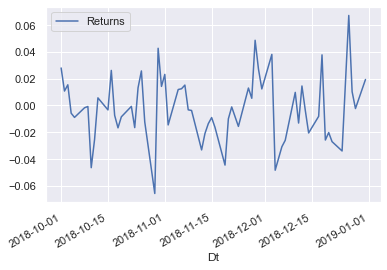

In [82]:
# hedge?
# alpha
b_s = ex_linReg.params['SPY']
b_x = ex_linReg.params['XLK']
b_0 = ex_linReg.params['const']
alpha_ex = AAPL_test['Returns'] - b_s * ex_test['SPY'] - b_x * ex_test['XLK']
alpha_ex = pd.DataFrame(alpha_ex, columns=['Alpha'], index=tindex)

# plot
alpha_BA_SPY.plot()

In [83]:
alpha_BA_SPY.describe()

,Returns
count,63.000000
mean,-0.001959
std,0.024620
min,-0.065864
25%,-0.016544
50%,-0.003413
75%,0.013029
max,0.067160


On average, the new regression doesn't provide a positive alpha.

**Examine model prediction**

<AxesSubplot:xlabel='Dt'>

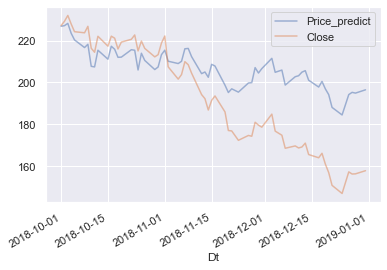

In [84]:
# convert prediction to price
ex_pred_price = pred2price(ex_pred)

# plot
ex = pd.concat([ex_pred_price, AAPL_test_close], axis=1)
ex.plot(alpha=0.5, style='-')

More information was included for test. Naturally the prediction is better. It's still off near the tail, so there's some factors not accounted for, maybe material and energy cost.


In [85]:
print('Done!')

Done!
